In [1]:
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

16547
8275
8274
8274
8274
8276
8274
8275
8277
33234
16617
16610
16614
16612
16615
16612
16612
16612
66297
33142
33144
33147
33144
33141
33146
33140
33147
130557
65273
65268
65262
65270
65278
65277
65282
65260
171780
137693
137688
137699
137690
137696
137692
137702
137696


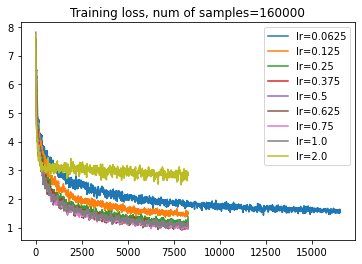

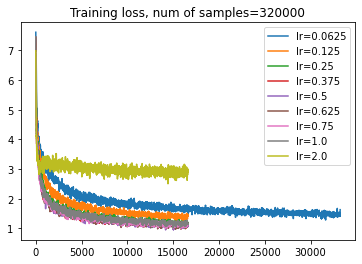

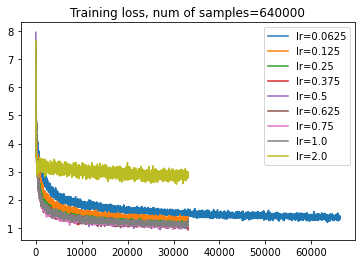

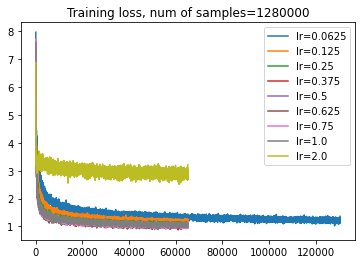

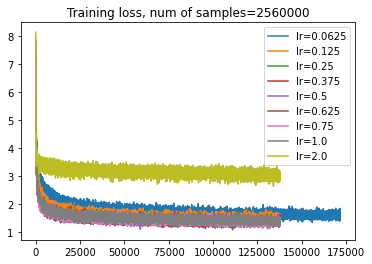

In [3]:
for num_samples in [160000, 320000, 640000, 1280000, 2560000]:

    training_losses = []
    fig, ax = plt.subplots()

    for lr in ['0.0625', '0.125', '0.25', '0.375', '0.5', '0.625', '0.75', '1.0', '2.0']:

        folder = f'WMT14_sample{num_samples}_depth6_lr{lr}_dropout0.1'

        training_loss = []
        num_batches = 0

        with open(f'../../checkpoint/NMT_epochs/Simpson/{folder}/log_0.txt', 'r') as f:
            lines = f.readlines()
            for line in lines:
                x = line.split()
                if 'Transformer' in x and 'target' in x and 'global' in x:
                    training_loss.append(float(x[-1]))
                    num_batches += 1

        print(len(training_loss))
        training_loss = savgol_filter(training_loss, 51, 3)
        ax.plot(training_loss, label = f'lr={lr}')

    plt.legend(loc="best")
    plt.title(f'Training loss, num of samples={num_samples}')